In [2]:
#Aakash Chauhan TSF task 2 feb2021 
#Prediction using unsupervised learning

#import libraries and our dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
path = "E:\data\Iris.csv"
df = pd.read_csv(path)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#getting metadata
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


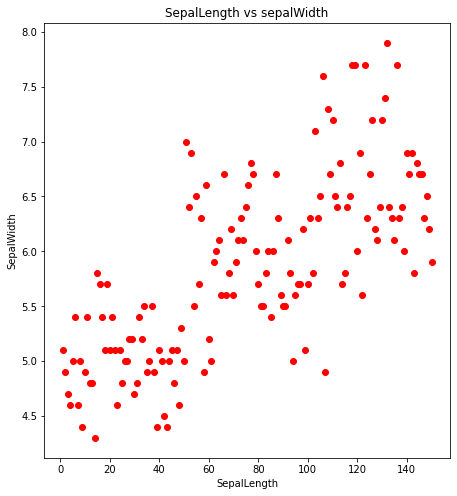

In [14]:
#Visualizing  data
#scatter plot to determine the relation between 1)sepal length vs sepal width 
fig = plt.figure(figsize = (16,8))
plot1 = fig.add_subplot(121)
plot1.scatter(df.iloc[:,0],df.iloc[:,1],c = 'red')
plot1.set_title("SepalLength vs sepalWidth")
plot1.set_xlabel("SepalLength")
plot1.set_ylabel("SepalWidth")
plt.show()

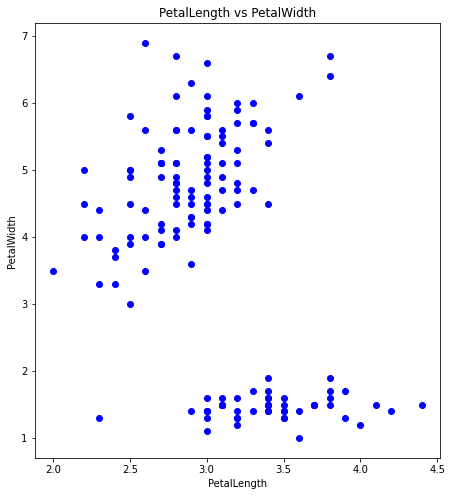

In [16]:
#scatter plot to determine the relation between petal length vs petal width
fig = plt.figure(figsize = (16,8))
plot2 = fig.add_subplot(122)
plot2.scatter(df.iloc[:,2],df.iloc[:,3],c = 'blue')
plot2.set_title("PetalLength vs PetalWidth")
plot2.set_xlabel("PetalLength")
plot2.set_ylabel("PetalWidth")
plt.show()

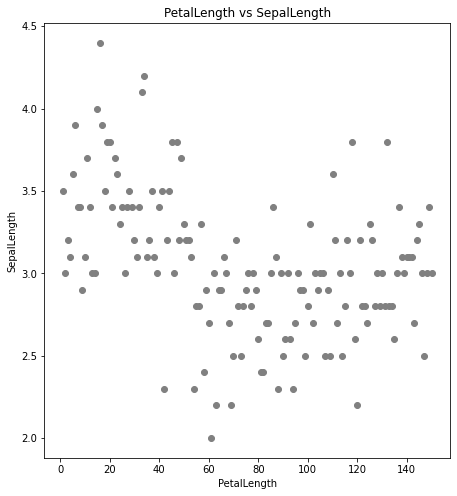

In [19]:
#scatter plot to determine the relation between petal length vs sepal length
fig = plt.figure(figsize = (16,8))
plot1 = fig.add_subplot(121)
plot1.scatter(df.iloc[:,0],df.iloc[:,2],c = 'grey')
plot1.set_title("PetalLength vs SepalLength")
plot1.set_xlabel("PetalLength")
plot1.set_ylabel("SepalLength")
plt.show()

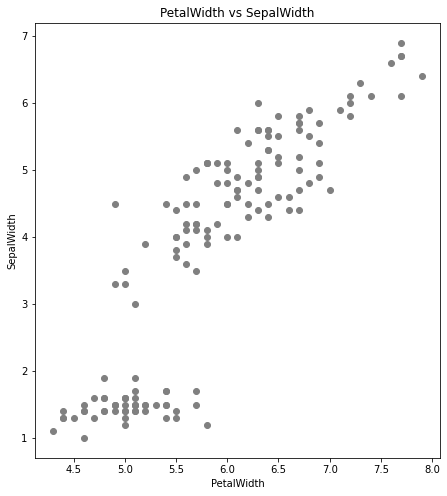

In [21]:
#scatter plot to determine the relation between petal width vs sepal width
fig = plt.figure(figsize = (16,8))
plot2 = fig.add_subplot(122)
plot2.scatter(df.iloc[:,1],df.iloc[:,3],c = 'grey')
plot2.set_title("PetalWidth vs SepalWidth")
plot2.set_xlabel("PetalWidth")
plot2.set_ylabel("SepalWidth")
plt.show()

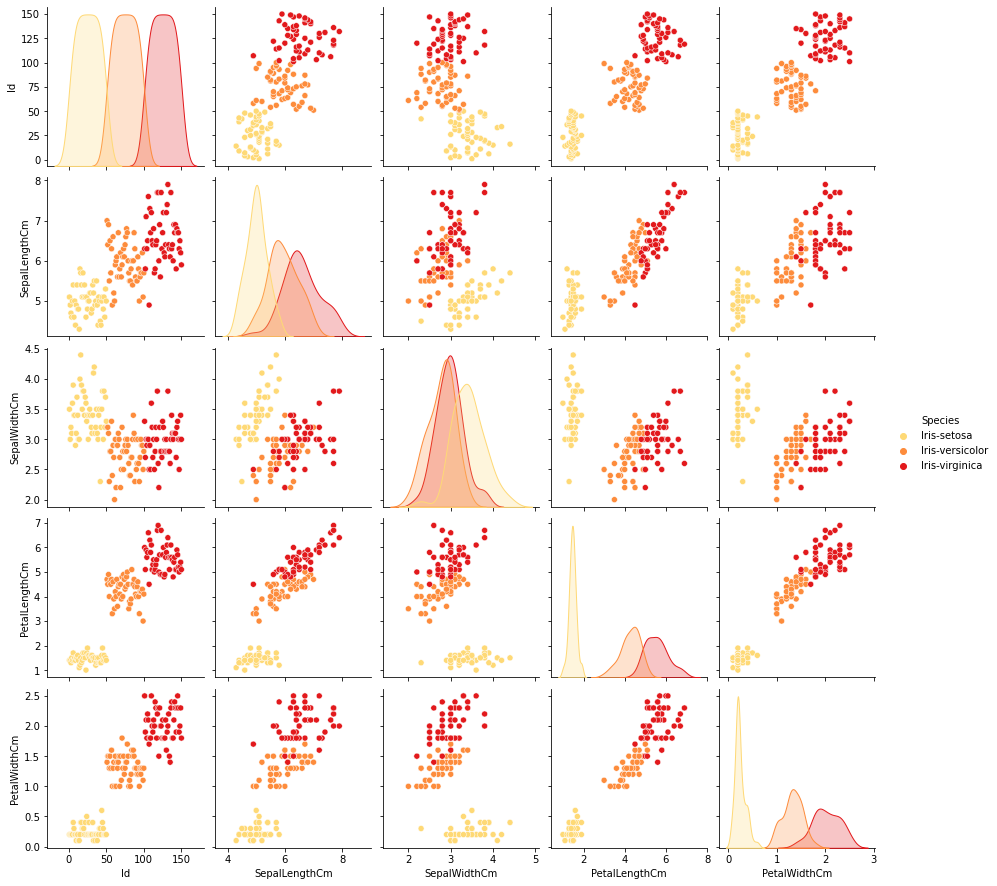

In [22]:
sns.pairplot(df,hue = 'Species',palette ="YlOrRd")
plt.show()

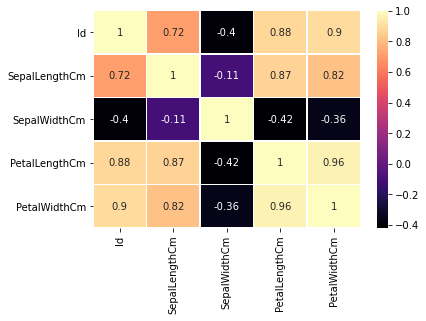

In [24]:
sns.heatmap(df.corr(),linewidth = 0.5,cmap  = 'magma', annot = True)
plt.show()

In [25]:
#In above observation we get to know PetalLength,PetalWidth,PetalLength,SepalLength have strong positive correlation between them
#we get to know SepalWidth,SepalLength have negative correlation between them

In [26]:
#creating variable x
x= df.iloc[:,[0,1,2,3]].values

In [27]:
#Performing KMeans clustering
from sklearn.cluster import KMeans
wcss = []
for i  in range(1,15):
    k = KMeans(n_clusters = i , init = 'k-means++',max_iter  = 300, n_init = 10,random_state = 101 )
    k.fit(x)
    wcss.append(k.inertia_)

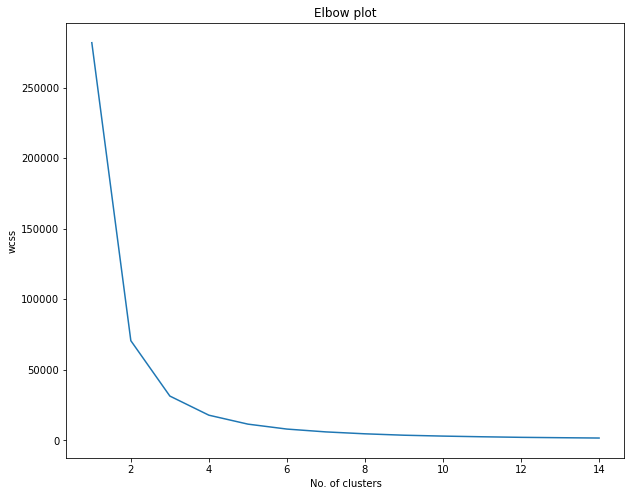

In [28]:
#Plottting elbow plot
elbow = plt.figure(figsize = (10,8))
plt.plot(range(1,15),wcss,)
plt.title("Elbow plot")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [31]:
#Applying KMeans to dataset
k = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 101)
y_kmeans = k.fit_predict(x)

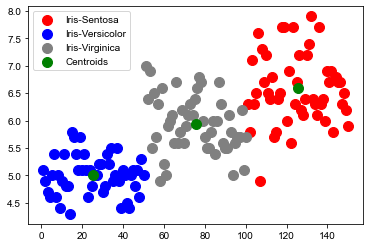

In [33]:
#Visualizing clusters for first two columns
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],
           s = 100, c =  'red',label = 'Iris-Sentosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],
           s = 100, c =  'blue',label = 'Iris-Versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],
           s = 100, c =  'grey',label = 'Iris-Virginica')

#Plotting centroids of the clusters
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],
           s  = 100 , c =  'green',label = 'Centroids')
plt.legend()
sns.set(rc={'figure.figsize':(5,5)})